In this project, our goal is to predict the divorce based on all the available features and identify important features using machine learning methods.  The dataset contains 84 divorced women/men (class=1) and 86 women/men in happy marriage who never thought of divorce (class=0). Each individual in the study is interviewed and asked to fill a form with 54 questions. 

So let us start with importing the libraries for this project. We'll be using the programming language R for carrying out the analysis.

In [1]:
## Importing packages
library('readxl')
library('boot')
library('ggplot2')
library('caret')
library('dplyr')
install.packages('ggthemes')
library(ggthemes)
library(gridExtra)
install.packages('corrplot')
library('corrplot')
library('glmnet')
library('MASS')
library('boot')
library('class')
library('tree')
library('randomForest')
library('e1071')
install.packages("ROSE")
library("ROSE")
# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:boot’:

    melanoma



Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘ggthemes’ is not available (for R version 3.6.0)”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http:/

[1] "divorce.csv"

Let us now import the dataset as Divorce_Data and let us see the first five observations of the dataset. Furthermore, let us use the mutate option to convert the outcome columns to factors.

In [2]:
Divorce_Data <- read.csv("../input/divorce.csv")
head(Divorce_Data)
Divorce_Data = Divorce_Data %>%
  mutate(
    
    # Label as Married or Divorced based on Class.
    Class = case_when(
      Class == 0 ~ "married",
      Class == 1 ~ "divorced"
    ),
    
    # Converting class to factors
    Class = as.factor(Class),
  )

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,⋯,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,2,4,1,0,0,0,0,0,0,⋯,2,1,3,3,3,2,3,2,1,1
2,4,4,4,4,4,0,0,4,4,4,⋯,2,2,3,4,4,4,4,2,2,1
3,2,2,2,2,1,3,2,1,1,2,⋯,3,2,3,1,1,1,2,2,2,1
4,3,2,3,2,3,3,3,3,3,3,⋯,2,2,3,3,3,3,2,2,2,1
5,2,2,1,1,1,1,0,0,0,0,⋯,2,1,2,3,2,2,2,1,0,1
6,0,0,1,0,0,2,0,0,0,1,⋯,2,2,1,2,1,1,1,2,0,1


By looking at the data, we can see the 54 predictor variables which is basically the rating on the scale of 0-4 for each o the 54 questions asked. Let us assume that the ratings are arranged in the order of 0- Never, 1- Rarely, 2- Sometimes, 3- Mostly, 4- Always. Now, let us check the missing values in the dataset so that there are no irregularities in our computations later on.

In [3]:
na_count <-sapply(Divorce_Data, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
sum(na_count)

[1] 0

As the sum of missing counts is 0, we can be satisfied that there are no missing values. Now let us check for some anomalies in the data.

In [4]:
a<- as.vector(as.matrix(Divorce_Data))
unique(a)

[1] "2"        "4"        "3"        "0"        "1"        "divorced" "married"

We can see that all values range from 0-4 so we can be content that there are no abnormal values. Also, in the response variable, we only get divorced and married so we're okay so far. Let us now split the data into training and a test data set. This is basically taking a validation set approach.

In [5]:
set.seed(1)
training<- sample(170,119)
train_set <- Divorce_Data[training,]
test <- Divorce_Data[-training,]

Now let us illustrate the relation of how each predictor variable is associated with the response variable Class. We just take the first 5 attributes to depict the distribution of the entire predictor variable set as it will be much easier to interpret. 

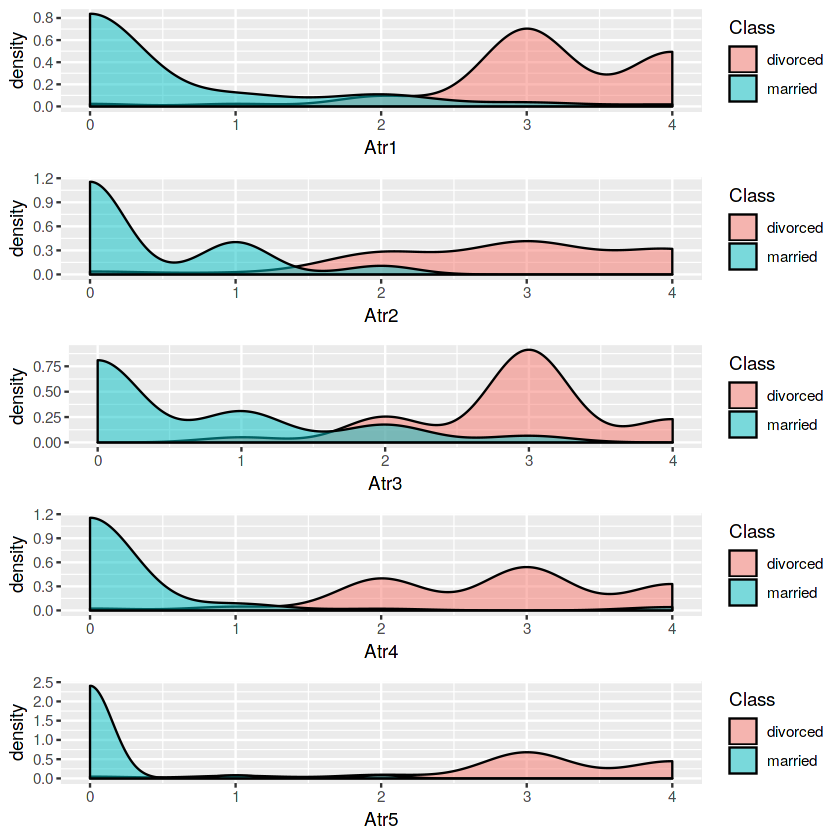

In [6]:
predictor_variables = setdiff(colnames(Divorce_Data), "Class")
Divorce_data_1= Divorce_Data[,c(1,2,3,4,5)]
predictor_variables_1 = setdiff(colnames(Divorce_data_1), "Class")
plot_list = list()


i = 1


for (predictor_variable in predictor_variables_1) {
  plot = ggplot(train_set) + 
    geom_density(aes_string(x=predictor_variable, fill="Class"), alpha=0.5)
  plot_list[[i]] = plot
  i = i + 1
}  

do.call("grid.arrange", c(plot_list, ncol = 1))

Let us now see how well the variables are correlated amongst each other. If we sense a high correlation between the predictor variables, performing variable selection should give us better results in the prediction phases.

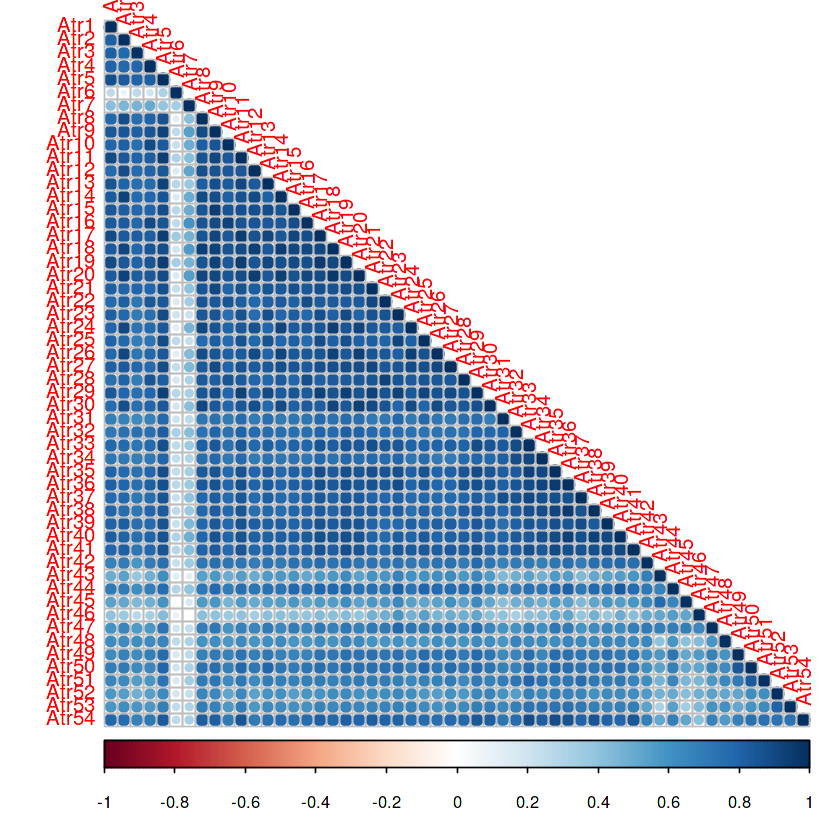

In [7]:
library('corrplot')
corrrelationMatrix = cor(train_set[, predictor_variables])
corrplot(corrrelationMatrix, type='lower')

As we can see, our variables are highly correlated with each other. So in order to remove the redudancy, we need to do variable selection and select some of the variables which actually affect the prediction of the Class variable. As we've learnt in class, there are many ways to choose the best model or perform model selection. We'll be experimenting with two methods: Lasso Regression (Shrinkage Methods) and Principal Component Analysis (Dimensionality Reduction).

**Lasso Regression on the Divorce Dataset**'

Let us first get the optimal value of lambda, which would act as the tuning parameter. This can be done through Cross Validation.

[1] 0.0002744989

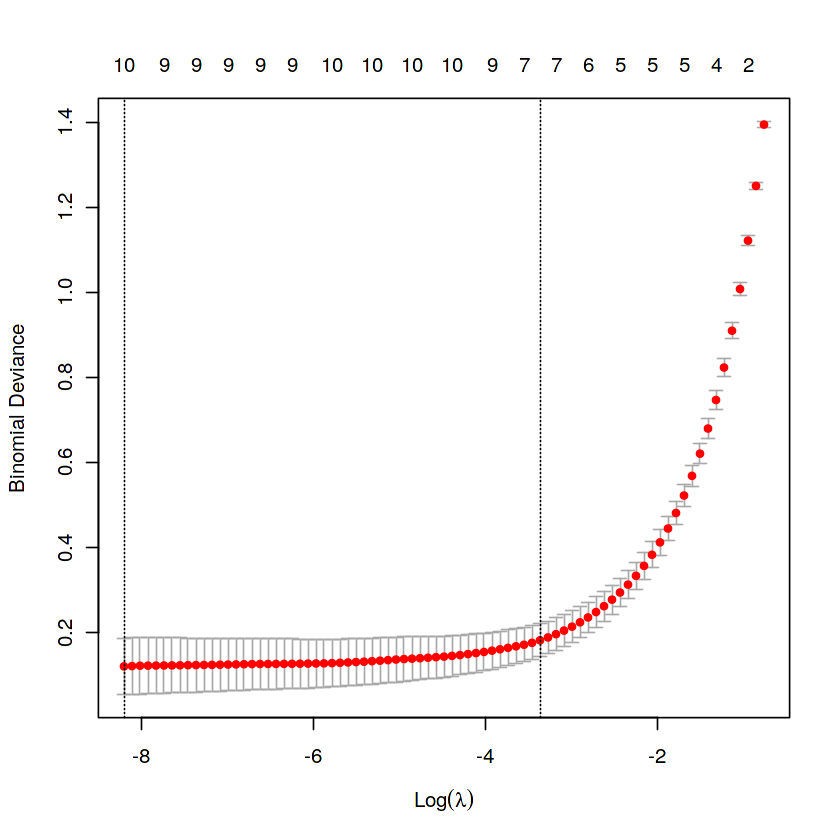

In [8]:
train_set_2 <- train_set
train_set_2['Class_factor']<- ifelse(train_set$Class=='married',0 ,1)  #Creating the 0,1 representation of the class.
X<- train_set_2[, 1:54]
Y<- train_set_2[,56]
cv.out2= cv.glmnet(as.matrix(X), as.matrix(Y), alpha=1, family='binomial') #Cross Validation for the Tuning Parameter
plot(cv.out2)
bestlam_Lasso = cv.out2$lambda.min
bestlam_Lasso 

We can see that we get the best lambda value of 0.000274. Let us use this for making a model selection. Our main goal is to perform variable selection for our final model. Then we aim at predicting the values based on the test dataset that we created earlier and estimate the test error MSE.

In [9]:
lasso.mod <- glmnet(as.matrix(X), train_set_2$Class_factor, alpha=1, lambda = bestlam_Lasso, family='binomial')
coef(lasso.mod)


55 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) -12.99631394
Atr1          .         
Atr2          .         
Atr3          0.80899605
Atr4          .         
Atr5          .         
Atr6          1.27514084
Atr7          .         
Atr8          .         
Atr9          .         
Atr10         .         
Atr11         0.50079350
Atr12         .         
Atr13         .         
Atr14         .         
Atr15         0.79908247
Atr16         .         
Atr17         .         
Atr18         .         
Atr19         .         
Atr20         .         
Atr21         .         
Atr22         .         
Atr23         .         
Atr24         .         
Atr25         .         
Atr26         0.38634810
Atr27         .         
Atr28         .         
Atr29         .         
Atr30         .         
Atr31         .         
Atr32         .         
Atr33         .         
Atr34         .         
Atr35         .         
Atr36         .         
Atr37   

As you can see, Lasso performs variable selection. As per the above coefficient summaries, It chooses Atr3,Atr6,Atr11,Atr15,Atr26,Atr40,Atr44,Atr49,Atr52,Atr53 as the important features. Now let us move on towards the predictions.

In [10]:
X_test<- test[,1:54]
test['Class_factor']<- ifelse(test$Class=='married',0 ,1)
probabilities <- lasso.mod %>% predict(as.matrix(X_test)) #Compute probabilities for an observation belonging to a particular class
predict.classes <- ifelse(probabilities>0.5, 1,0) #Assign classes based on probabilities
observed.classes<- test$Class_factor
Accuracy <- mean(predict.classes == observed.classes) #Classification Rate
Accuracy*100
Test_Error_Mis <- 1-Accuracy #Misclassification Rate
Test_Error_Mis

[1] 98.03922

[1] 0.01960784

You can see that Lasso gives an accuracy of 98% and an Test Error of 0.0196 which is basically the misclassification rate.

Another way we can proceed is by using Principal Component Analysis which projects the predictors in M < P dimensions. This is a technique of dimensionality reduction which also helps deal with the curse of dimensionality.

In [11]:
train_pca <- prcomp(train_set[, 1:54], scale=TRUE, center=TRUE)
summary(train_pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     6.3136 1.43041 1.28176 1.10341 0.95651 0.89792 0.87206
Proportion of Variance 0.7382 0.03789 0.03042 0.02255 0.01694 0.01493 0.01408
Cumulative Proportion  0.7382 0.77606 0.80648 0.82903 0.84597 0.86090 0.87499
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.78950 0.76491 0.73067 0.68783 0.65235 0.63374 0.5878
Proportion of Variance 0.01154 0.01083 0.00989 0.00876 0.00788 0.00744 0.0064
Cumulative Proportion  0.88653 0.89736 0.90725 0.91601 0.92389 0.93133 0.9377
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.53353 0.52102 0.51608 0.47872 0.45840 0.42780 0.42012
Proportion of Variance 0.00527 0.00503 0.00493 0.00424 0.00389 0.00339 0.00327
Cumulative Proportion  0.94300 0.94803 0.95296 0.95720 0.96109 0.96448 0.96775
                          PC22    

We would want the minimum number of principal components to explain the entire variability in the data. Let us see the plot between the variances and the PCs. According to the plot, we can see that PC1 alone does a great job in explaining the variablity.

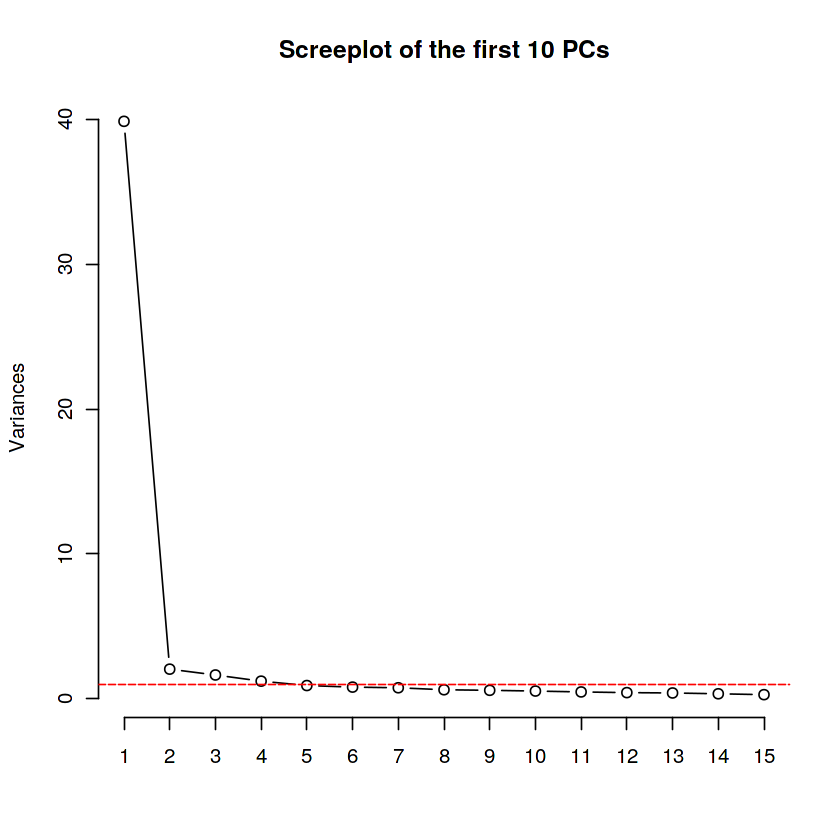

In [12]:
screeplot(train_pca, type = "l", npcs = 15, main = "Screeplot of the first 10 PCs")
abline(h = 1, col="red", lty=5)

In [13]:
train_pc = as.data.frame(train_pca$x)
train_pc$Class = train_set$Class

test_pc = predict(train_pca, newdata = test)
test_pc = as.data.frame(test_pc)
test_pc$Class = test$Class

We can also see a plot between the principal components. Here's a plot between PC1 and PC2 for the classes, married and divorced.

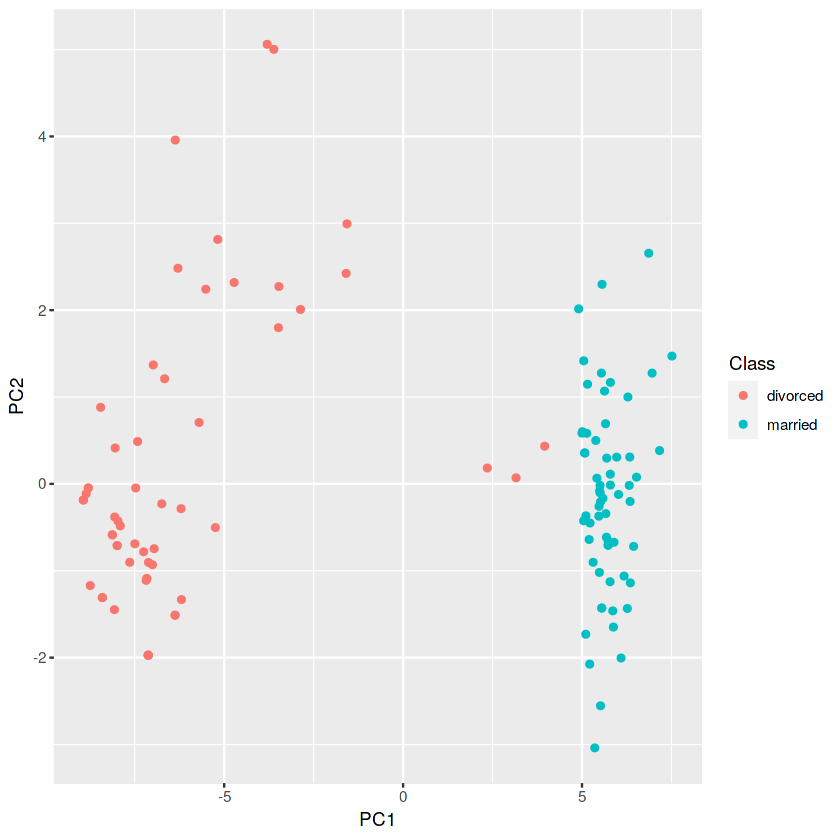

In [14]:
ggplot(train_pc) + 
  geom_point(aes(x=PC1, y=PC2, color=Class))

Now that we've looked at Lasso and PCA, let us move ahead and experiment with the machine learning algorithms for classification. The ones that we will be looking at are:

1. Logistic Regression
2. K-Nearest Neighbors
3. Naive Bayes Classifier
4. Random Forest Classifier
5. Support Vector Machine

We would be evaluating the Train and Test MSE along with their prediction accuracies for each classifier

**Logistic Regression**

* Perform Logistic Regression on our test data set using all predictor variables and see how it performs.

In [15]:
logistic_model_all<- glm(Class ~ ., data=train_set, family='binomial')
glm_train_pred_probs = predict(logistic_model_all, type="response")
glm_train_preds = as.factor(ifelse(glm_train_pred_probs > 0.5, "married", "divorced")) #Predictions on training Data
confusionMatrix(glm_train_preds, train_set$Class) 

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       57       0
  married         0      62
                                     
               Accuracy : 1          
                 95% CI : (0.9695, 1)
    No Information Rate : 0.521      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.000      
            Specificity : 1.000      
         Pos Pred Value : 1.000      
         Neg Pred Value : 1.000      
             Prevalence : 0.479      
         Detection Rate : 0.479      
   Detection Prevalence : 0.479      
      Balanced Accuracy : 1.000      
                                     
       'Positive' Class : divorced   
                                     

You can see that the accuracy is 100% and there is no training error for this model. Now let us estimate the Test Error.

In [16]:
glm_test_pred_probs = predict(logistic_model_all, type="response",newdata= test)
glm_test_preds_All = as.factor(ifelse(glm_test_pred_probs > 0.5, "married", "divorced")) #Predictions on test data
confusionMatrix(glm_test_preds, test$Class)

ERROR: Error in confusionMatrix(glm_test_preds, test$Class): object 'glm_test_preds' not found


We can see a slight reduction in accuracy to 98.04% and a Test Error = 0.02 roughly.

* Now let us perform Logistic Regression using the variables chosen by Lasso and see how it performs.

In [17]:
logistic_model_lasso<- glm(Class ~ Atr3+Atr6+Atr11+Atr15+Atr26+Atr40+Atr44+Atr49+Atr52+Atr53, data=train_set, family='binomial')
glm_train_pred_probs = predict(logistic_model_lasso, type="response")
glm_train_preds = as.factor(ifelse(glm_train_pred_probs > 0.5, "married", "divorced"))
confusionMatrix(glm_train_preds, train_set$Class) 

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       57       0
  married         0      62
                                     
               Accuracy : 1          
                 95% CI : (0.9695, 1)
    No Information Rate : 0.521      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.000      
            Specificity : 1.000      
         Pos Pred Value : 1.000      
         Neg Pred Value : 1.000      
             Prevalence : 0.479      
         Detection Rate : 0.479      
   Detection Prevalence : 0.479      
      Balanced Accuracy : 1.000      
                                     
       'Positive' Class : divorced   
                                     

We get a 100% accuracy and a 0 Training Error. Now let us estimate the Test Error.

In [18]:
glm_test_pred_probs = predict(logistic_model_lasso, type="response", newdata=test)
glm_test_preds_Lasso = as.factor(ifelse(glm_test_pred_probs > 0.5, "married", "divorced"))
confusionMatrix(glm_test_preds_Lasso, test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

We can see a slight reduction in accuracy to 98.04% and a Test Error = 0.02 roughly.

* Now let us perform Logistic Regression using the PC1 from the PCA that we performed earlier and see how it performs.

In [19]:
logistic_model_PC<- glm(Class ~ PC1, data=train_pc, family='binomial')
glm_train_pred_probs = predict(logistic_model_PC, type="response")
glm_train_preds_PC = as.factor(ifelse(glm_train_pred_probs > 0.5, "married", "divorced"))
confusionMatrix(glm_train_preds_PC, train_set$Class)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       57       0
  married         0      62
                                     
               Accuracy : 1          
                 95% CI : (0.9695, 1)
    No Information Rate : 0.521      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.000      
            Specificity : 1.000      
         Pos Pred Value : 1.000      
         Neg Pred Value : 1.000      
             Prevalence : 0.479      
         Detection Rate : 0.479      
   Detection Prevalence : 0.479      
      Balanced Accuracy : 1.000      
                                     
       'Positive' Class : divorced   
                                     

We get a 100% accuracy and a 0 Training Error. Now let us estimate the Test Error.

In [20]:
glm_test_pred_probs = predict(logistic_model_PC, type="response", test_pc)
glm_test_preds = as.factor(ifelse(glm_test_pred_probs > 0.5, "married", "divorced"))
confusionMatrix(glm_test_preds, test_pc$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       27       0
  married         0      24
                                     
               Accuracy : 1          
                 95% CI : (0.9302, 1)
    No Information Rate : 0.5294     
    P-Value [Acc > NIR] : 8.194e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5294     
         Detection Rate : 0.5294     
   Detection Prevalence : 0.5294     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : divorced   
                                     

We get a 100% accuracy and a Test Error of 0. This model is the best out of all three in terms of Test Error which is a proper measure for model accuracy.

Now, we can compare the binary classifiers that we used by using the concept of ROC curves and computing the Area Under Curve(AUC), which determines how well a classifier works. 

Area under the curve (AUC): 0.981

Area under the curve (AUC): 0.981

Area under the curve (AUC): 1.000

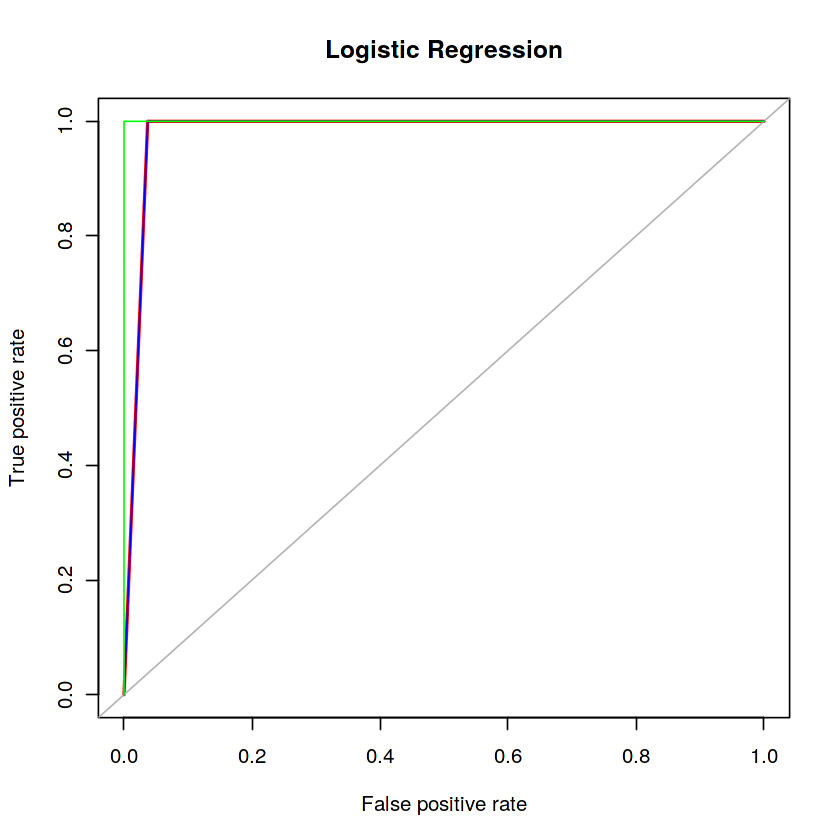

In [21]:
roc.curve(test$Class,glm_test_preds_All,plotit=TRUE,main="Logistic Regression",col="Red") #All Variables
roc.curve(test$Class,glm_test_preds_Lasso,plotit=TRUE,add=T,col='Blue') #Lasso
roc.curve(test_pc$Class,glm_test_preds,plotit=TRUE,add=T,col='green') #PC

Let us see get a Cross Validation estimate of the test error using 10-fold Cross Validation on Logistic Regression.

In [22]:
set.seed(1)
cv.error.5=rep(0,5)
for (i in 1:10){
  glm.fit<-glm(Class~.,data=train_set,family=binomial)
  cv.error.5[i]=cv.glm(train_set,glm.fit,K=10)$delta[1]
}
cv.error.5 #All test mse for 10-fold cross validation
mean(cv.error.5) #CV Error

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm

[1] 0.07119422 0.05734624 0.05088746 0.07155752 0.05523525 0.04074330
 [7] 0.08267928 0.06748994 0.07817529 0.05488882

[1] 0.06301973

The Cross Validation Error for Logistic Regression with all variables is 0.063.

** 2. K-Nearest Neighbors**

Before we start with computing the train and the test MSE, let us figure out the optimal value of neighbors(K) using 10-fold cross validation. This is called hyperparameter tuning.

In [23]:
trControl<- trainControl(method  = "cv",
                         number  = 10)
fit <- train(Class ~ .,
             method     = "knn",
             tuneGrid   = expand.grid(k = 1:10),
             trControl  = trControl,
             metric     = "Accuracy",
             data       = train_set)

fit

k-Nearest Neighbors 

119 samples
 54 predictor
  2 classes: 'divorced', 'married' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 106, 108, 108, 107, 106, 107, ... 
Resampling results across tuning parameters:

  k   Accuracy  Kappa   
   1  0.975641  0.951004
   2  0.975641  0.951004
   3  0.975641  0.951004
   4  0.975641  0.951004
   5  0.975641  0.951004
   6  0.975641  0.951004
   7  0.975641  0.951004
   8  0.975641  0.951004
   9  0.975641  0.951004
  10  0.975641  0.951004

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 10.

Surprisingly, for this dataset, all the k values gives us the same accuracy. For our convenience, let us choose K=3.

* Performing KNN with all predictor variables in the model.

In [24]:
train.X <- train_set[,1:54]
test.X <- test[, 1:54]

pred.knn_all <- knn(train.X, test.X, train_set$Class, k = 3)
confusionMatrix(pred.knn_all, test$Class)

mean(pred.knn_all != test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

[1] 0.01960784

We get an accuracy of 98.04% and a Test Error of 0.0196.

*  Performing KNN with all predictor variables choses by Lasso earlier.

In [25]:
train.X <- train_set[,c(3,6,11,15,26,40,44,49,52,53)]
test.X <- test[,c(3,6,11,15,26,40,44,49,52,53)]
pred.knn_Lasso <- knn(train.X, test.X, train_set$Class, k = 3)
confusionMatrix(pred.knn_Lasso, test$Class)

mean(pred.knn_Lasso != test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

[1] 0.01960784

We get an accuracy of 98.04% and a Test Error of 0.0196.

*  Performing KNN with PC1 derived from PCA earlier.

In [26]:
train.X <- train_pc$PC1
test.X <- test_pc$PC1

pred.knn_PC <- knn(as.data.frame(train.X), as.data.frame(test.X), train_pc$Class, k = 3)
confusionMatrix(pred.knn_PC, test_pc$Class)

mean(pred.knn_PC != test_pc$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       27       0
  married         0      24
                                     
               Accuracy : 1          
                 95% CI : (0.9302, 1)
    No Information Rate : 0.5294     
    P-Value [Acc > NIR] : 8.194e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5294     
         Detection Rate : 0.5294     
   Detection Prevalence : 0.5294     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : divorced   
                                     

[1] 0

We get an Accuracy of 100% and a Test Error of 0. Again, the model with PC1 outperforms the other models.

Area under the curve (AUC): 0.981

Area under the curve (AUC): 0.981

Area under the curve (AUC): 1.000

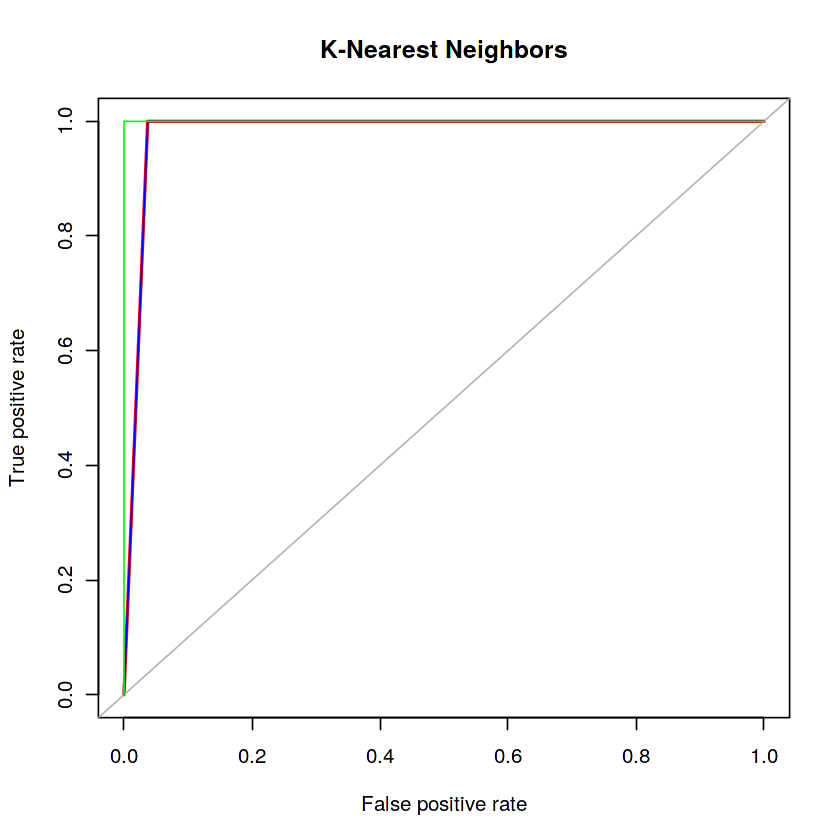

In [27]:
roc.curve(test$Class,pred.knn_all,plotit=TRUE,main="K-Nearest Neighbors",col="Red") #All Variables
roc.curve(test$Class,pred.knn_Lasso,plotit=TRUE,add=T,col='Blue') #Lasso
roc.curve(test_pc$Class,pred.knn_PC,plotit=TRUE,add=T,col='green') #PC

**3. Naive Bayes Classifier**

* Let us perform Naive Bayes will all original predictor variables.

In [28]:
NB_Model_All = naiveBayes(Class ~ ., data=train_set)
NB_predictions_All = predict(NB_Model_All, newdata=train_set)
confusionMatrix(NB_predictions_All, train_set$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       54       0
  married         3      62
                                          
               Accuracy : 0.9748          
                 95% CI : (0.9281, 0.9948)
    No Information Rate : 0.521           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9494          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.9474          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9538          
             Prevalence : 0.4790          
         Detection Rate : 0.4538          
   Detection Prevalence : 0.4538          
      Balanced Accuracy : 0.9737          
                                          
       'Positive' Class : divorced        
   

We get an accuracy of 97.48% and a Training Error of 0.0252. Let us see the Test Error.

In [29]:
NB_predictions_test_All = predict(NB_Model_All, newdata=test)
confusionMatrix(NB_predictions_test_All, test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

We get an accuracy of 98.04% and a Test Error of 0.0196.

*  Performing Naive Bayes with variables chosen by Lasso earlier.

In [30]:
NB_Model_Lasso = naiveBayes(Class ~ Atr3+Atr6+Atr11+Atr15+Atr26+Atr40+Atr44+Atr49+Atr52+Atr53, data=train_set)
NB_predictions_Lasso = predict(NB_Model_Lasso, newdata=train_set)
confusionMatrix(NB_predictions_Lasso, train_set$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       57       0
  married         0      62
                                     
               Accuracy : 1          
                 95% CI : (0.9695, 1)
    No Information Rate : 0.521      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.000      
            Specificity : 1.000      
         Pos Pred Value : 1.000      
         Neg Pred Value : 1.000      
             Prevalence : 0.479      
         Detection Rate : 0.479      
   Detection Prevalence : 0.479      
      Balanced Accuracy : 1.000      
                                     
       'Positive' Class : divorced   
                                     

We get an accuracy of 100% and a Training Error of 0. Let us compute the Test Error.

In [31]:
NB_predictions_test_Lasso = predict(NB_Model_Lasso, newdata=test)
confusionMatrix(NB_predictions_test_Lasso, test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

We get an accuracy of 98.04% and a Test Error of 0.0196.

*  Performing Naive Bayes with PC1 derived from the PCA done earlier.

In [32]:
NB_Model = naiveBayes(Class ~ PC1, data=train_pc)
NB_predictions = predict(NB_Model, newdata=train_pc)
confusionMatrix(NB_predictions, train_pc$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       56       0
  married         1      62
                                          
               Accuracy : 0.9916          
                 95% CI : (0.9541, 0.9998)
    No Information Rate : 0.521           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9832          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9825          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9841          
             Prevalence : 0.4790          
         Detection Rate : 0.4706          
   Detection Prevalence : 0.4706          
      Balanced Accuracy : 0.9912          
                                          
       'Positive' Class : divorced        
   

We get an accuracy of 99.16 % and a Training Error of 0.0084. Let us compute the Test Error.

In [33]:
NB_predictions_test = predict(NB_Model, newdata=test_pc)
confusionMatrix(NB_predictions_test, test_pc$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

We get an accuracy of 98.04% and a test MSE of 0.0196.

Area under the curve (AUC): 0.981

Area under the curve (AUC): 0.981

Area under the curve (AUC): 0.981

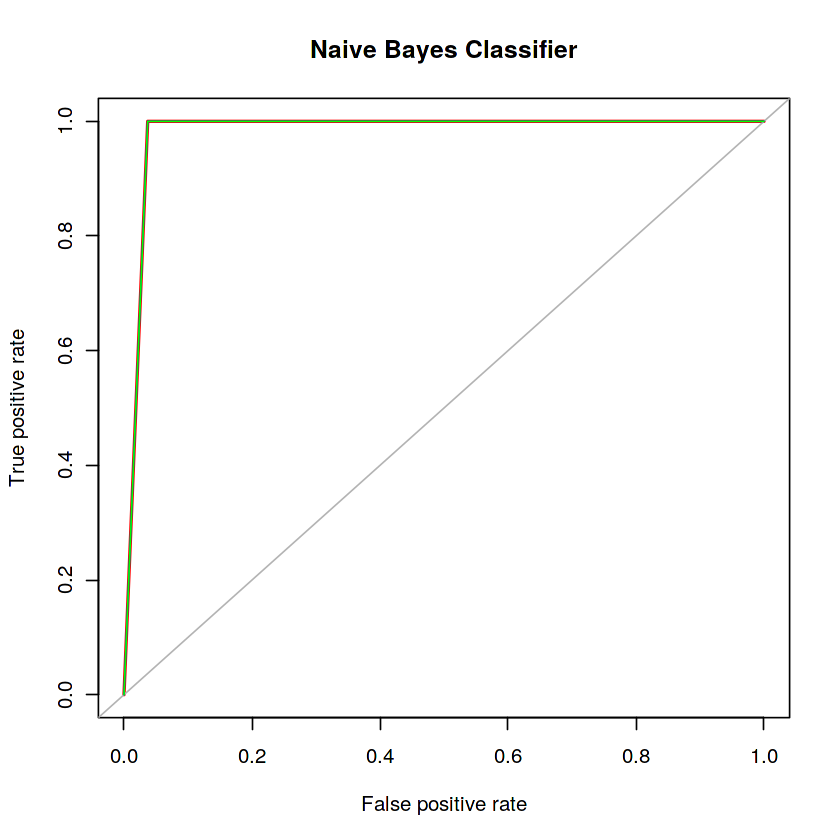

In [34]:
roc.curve(test$Class,NB_predictions_test_All,plotit=TRUE,main="Naive Bayes Classifier",col="Red") #All Variables
roc.curve(test$Class,NB_predictions_test_Lasso,plotit=TRUE,add=T,col='Blue') #Lasso
roc.curve(test_pc$Class,NB_predictions_test,plotit=TRUE,add=T,col='green') #PC

Let us try a 10-fold Cross Validation on Naive Bayes for all predictors to see the accuracy.

In [35]:
xtrain = train_set[,1:54]
ytrain=train_set$Class

xTest = test[,1:54]
yTest = test$Class

model = train(as.data.frame(xtrain),ytrain,'nb',trControl=trainControl(method='cv',number=10))
model

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”
Warning message in

Naive Bayes 

119 samples
 54 predictor
  2 classes: 'divorced', 'married' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 107, 107, 107, 106, 108, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.9907407  0.9814815
   TRUE      0.9750000  0.9500000

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = FALSE and adjust
 = 1.

When a normal density is used, the accuracy is 98.2% which gives roughly a Test Error of 0.018.
When a kernel density is used, the accuracy is 97.5 which gives roughly a Test Error of 0.025.

**4. Random Forest Classification**

* Let us perform Random Forest Classification using all predictor variables in the model.

In [36]:
RF_model <- randomForest(formula = as.factor(Class) ~ .,
                      data = train_set)
print(RF_model)


Call:
 randomForest(formula = as.factor(Class) ~ ., data = train_set) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 2.52%
Confusion matrix:
         divorced married class.error
divorced       54       3  0.05263158
married         0      62  0.00000000


Accuracy is 97.47% and Test Error is 0.0252. Let us compute the Test Error.

In [37]:
prediction_All<- predict(RF_model, test)
confusionMatrix(prediction_All,test$Class)
mean(prediction_All == test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

[1] 0.9803922

We get an accuracy of 98.04% and a Test Error of 0.0196.

* Now let us perform Random Forest Classification using variables selected by Lasso earlier.

In [38]:
RF_model_Lasso <- randomForest(formula = as.factor(Class) ~ Atr3+Atr6+Atr11+Atr15+Atr26+Atr40+Atr44+Atr49+Atr52+Atr53,data = train_set)
print(RF_model_Lasso)


Call:
 randomForest(formula = as.factor(Class) ~ Atr3 + Atr6 + Atr11 +      Atr15 + Atr26 + Atr40 + Atr44 + Atr49 + Atr52 + Atr53, data = train_set) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.52%
Confusion matrix:
         divorced married class.error
divorced       54       3  0.05263158
married         0      62  0.00000000


Accuracy is 97.47% and Training Error is 0.0252. Let us compute the Test Error.

In [39]:
prediction_Lasso<- predict(RF_model_Lasso, test)
confusionMatrix(prediction_Lasso,test$Class)
mean(prediction_Lasso == test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

[1] 0.9803922

We get an accuracy of 98.04% and a Test Error of 0.0196.

* Now let us perform Random Forest Classification using PC1 derived from PCA done earlier.

In [40]:
RF_model_PCA <- randomForest(formula = as.factor(Class) ~ PC1, data = train_pc)
print(RF_model_PCA)


Call:
 randomForest(formula = as.factor(Class) ~ PC1, data = train_pc) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 0%
Confusion matrix:
         divorced married class.error
divorced       57       0           0
married         0      62           0


We get an accuracy of 100% and a Training Error of 0. Let us compute the Test Error.

In [41]:
prediction<- predict(RF_model_PCA, test_pc)
confusionMatrix(prediction,test_pc$Class)
mean(prediction == test_pc$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       27       0
  married         0      24
                                     
               Accuracy : 1          
                 95% CI : (0.9302, 1)
    No Information Rate : 0.5294     
    P-Value [Acc > NIR] : 8.194e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5294     
         Detection Rate : 0.5294     
   Detection Prevalence : 0.5294     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : divorced   
                                     

[1] 1

We get an accuracy of 100% and a Test Error of 0, outperforming the other mentioned Random Forest models above.

Area under the curve (AUC): 0.981

Area under the curve (AUC): 0.981

Area under the curve (AUC): 1.000

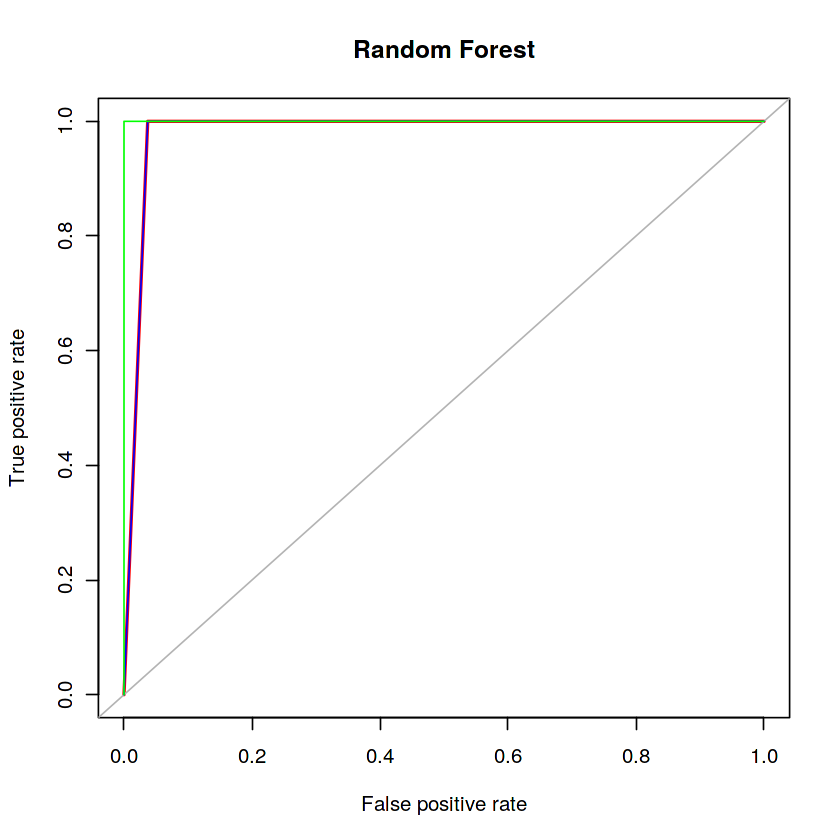

In [42]:
roc.curve(test$Class,prediction_All,plotit=TRUE,main="Random Forest",col="Red") #All Variables
roc.curve(test$Class,prediction_Lasso,plotit=TRUE,add=T,col='Blue') #Lasso
roc.curve(test_pc$Class,prediction,plotit=TRUE,add=T,col='green') #PC

**5. Support Vector Machine**


* Let us perform Support Vector Machine using all predictor variables in the model.

In [43]:
SVM_Model_all <- svm(formula = Class ~ ., 
                 data = train_set, 
                 type = 'C-classification', 
                 kernel = 'linear')
Predictions_SVM_All <- predict(SVM_Model_all, newdata = test)
confusionMatrix(Predictions_SVM_All,test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

We get an accuracy of 98.04% and a Test Error of 0.0196.

* Now let us perform SVM using chosen predictor variables from our Lasso earlier.

In [44]:
SVM_Model_Lasso <- svm(formula = Class ~ Atr3+Atr6+Atr11+Atr15+Atr26+Atr40+Atr44+Atr49+Atr52+Atr53, 
                 data = train_set, 
                 type = 'C-classification', 
                 kernel = 'linear')
Predictions_SVM_Lasso <- predict(SVM_Model_Lasso, newdata = test)
confusionMatrix(Predictions_SVM_Lasso,test$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

Again, we get an accuracy of 98.04% and a Test Error of 0.0196.

* Now let us perform SVM using PC1 derived from the PCA done earlier.

In [45]:
SVM_Model_PC <- svm(formula = Class ~ PC1, 
                 data = train_pc, 
                 type = 'C-classification', 
                 kernel = 'linear')
Predictions_SVM_PC <- predict(SVM_Model_PC, newdata = test_pc)
confusionMatrix(Predictions_SVM_PC,test_pc$Class)

Confusion Matrix and Statistics

          Reference
Prediction divorced married
  divorced       26       0
  married         1      24
                                          
               Accuracy : 0.9804          
                 95% CI : (0.8955, 0.9995)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 3.796e-13       
                                          
                  Kappa : 0.9607          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9630          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9600          
             Prevalence : 0.5294          
         Detection Rate : 0.5098          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.9815          
                                          
       'Positive' Class : divorced        
   

We end up with an accuracy of 98.04% and a Test Error of 0.0196.

Now,we can compare the binary classifiers that we used by using the concept of ROC curves and computing the Area Under Curve(AUC), which determines how well a classifier works. 

Area under the curve (AUC): 0.981

Area under the curve (AUC): 0.981

Area under the curve (AUC): 0.981

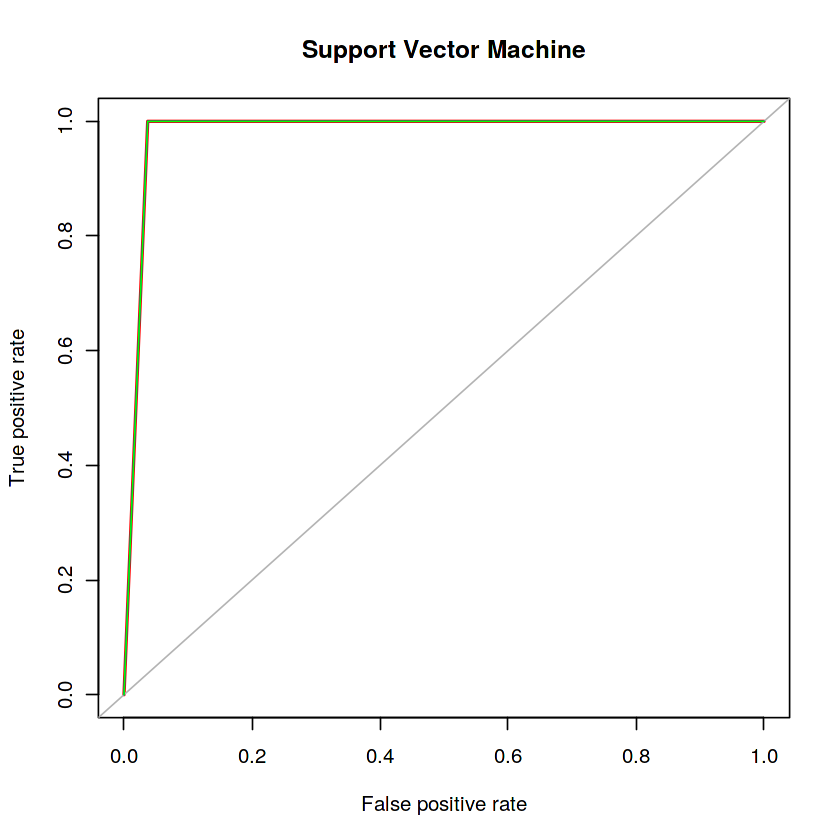

In [46]:
roc.curve(test$Class,Predictions_SVM_All,plotit=TRUE,main="Support Vector Machine",col="Red") #All Variables
roc.curve(test$Class,Predictions_SVM_Lasso,plotit=TRUE,add=T,col='Blue') #Lasso
roc.curve(test_pc$Class,Predictions_SVM_PC,plotit=TRUE,add=T,col='green') #PC

In conclusion, we experimented with different algorithms altogether to predict the divorce based on the available features. We used Shrinkage methods(Lasso) and Dimensionality Reduction methods(PCA) to get better model performance. Furthermore, for each algorithm, we compared models using Lasso selected predictors, PC1 from the PCA performed and all predictor variables. We also illustrated the ROC Curves and the Area under Curve for each algorithm.We find that models with PC1 give the highest model accuracy and lowest Test Error majority of the time.